# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 3
*gelöst von Stollmayer Max*

### Aufgabe 1

_Sei $y_{n+1} = y_n + h\ \Phi (t_n, y_n, h)$ eine explizite Ein-Schritt-Methode mit $\Phi (t, y, h) = a_1\ f(t,y) + a_2\ f\big(t+b_2\ h,\ y+ b_2\ h\ f(t,y)\big)$ und Koeffizienten $a_1 = \frac{1}{4},\ a_2 = \frac{3}{4},\ b_2 = \frac{2}{3}$ für das Modellproblem $y' = -\lambda\ y$ mit $\lambda > 0.$ Zeige, dass die Folge $(y_n)_{n \ge 0}$ genau dann beschränkt ist, wenn $0 \le h \le \frac{2}{\lambda}$ gilt._

#### Beweis
Für $y' = \lambda\ y$ ist $f(t,y) = f(y) = -\lambda\ y.$ Damit lässt sich $y_{n+1}$ explizit hinschreiben:

\begin{align*}
y_{n+1} &= y_n + h\ \bigg(\frac{1}{4}\ f(y_n) + \frac{3}{4}\ f\big(y_n + \frac{2}{3}\ h\ f(y_n)\big)\bigg) \\
&= y_n + h\ \bigg(-\frac{1}{4}\ \lambda\ y_n - \frac{3}{4}\ \lambda\ y_n + \frac{3}{4}\ \frac{2}{3}\ h\ \lambda^2\ y_n\big)\bigg) \\
&= \big(1 - \frac{\lambda}{4}\ h - \frac{3\ \lambda}{4}\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \big(1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \ ... \\
&= \big(1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)^{n+1}\ y_0
\end{align*}

Die geometrische Folge $(y_n)_{n \ge 0}$ ist nun genau dann beschränkt, wenn $|1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2| \le 1$ gilt, also äquivalent, wenn $-2 \le \frac{\lambda^2}{2}\ h^2 - \lambda\ h \le 0.$

$\bullet \quad$ $-2 \le \frac{\lambda^2}{2}\ h^2 - \lambda\ h \iff \frac{\lambda^2}{2}\ h^2 - \lambda\ h + 2 \ge 0,$ was für jedes $h \in \mathbb{R}$ und $\lambda > 0$ gilt.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 - \lambda\ h \le 0 \iff h\ (\lambda\ h - 2) \le 0 \iff \begin{cases}h \le 0 \land \lambda\ h - 2 \ge 0 \\ h \ge 0 \land \lambda\ h - 2 \le 0 \end{cases} \iff h \ge 0 \land h \le \frac{2}{\lambda}$

Da für $h \le 0$ die Ungleichung $\lambda\ h - 2 \le 0$ nicht gelten kann, ist die Behauptung $0 \le h \le \frac{2}{\lambda}$ gezeigt.
<div style="width:12px; height:12px; border:1px solid #000; margin-left:auto; margin-right:0;"></div>

### Aufgabe 2

_Zu implementieren ist das Rückwärts-Euler-Verfahren, sowie das Crank-Nicolson-Verfahren mithilfe der Fixpunkt-Iteration._

#### Konstruktion

Durch die Approximation mit einer rechtsseitigen Riemann-Summe des Integrals $y(t_{n+1}) - y(t_n) = \int_{t_n}^{t_{n+1}} \! f(t,y(t))\, \mathrm{d}t$ der Differentialgleichung $y'(t) = f(t, y)$ von $t_n$ bis $t_{n+1} = t_n + h$ erhält man $y(t_{n+1}) - y(t_n) \approx h f(t_{n+1},y(t_{n+1}))$. Daraus ergibt sich als Rückwärts-Euler-Verfahren $y_{n+1} = y_n + h f(t_{n+1}, y_{n+1}).$

Anstatt der Näherung des Integrals durch ein Rechteck, benutzt man für das Crank-Nicolson-Verfahren ein Trapez. Man erhält dadurch $\int_{t_n}^{t_{n+1}} \! f(t,y(t))\, \mathrm{d}t \approx \frac{h}{2} \big( f(t_n, y(t_n)) + f(t_{n+1}, y(t_{n+1})) \big)$. Das ergibt nun $y_{n+1} = y_n + \frac{h}{2} \big( f(t_n, y_n) + f(t_{n+1}, y_{n+1}) \big).$

#### Konvergenz

Man betrachte den lokalen Abschneidefehler $\tau_{n+1}(h) = \frac{y(t_{n+1}) - y(t_n)}{h} - \Phi,$ wobei $\Phi$ der Verfahrensschritt ist.

Für das Rückwärts-Euler-Verfahren ist $\Phi = f(t_{n+1}, y_{n+1})$ und wir erhalten:

\begin{align*}
    \tau_{n+1}
    &= \frac{y(t_{n+1}) - y(t_n)}{h} - f(t_{n+1}, y(t_{n+1})) \\
    &= \frac{y(t_n + h) - y(t_n)}{h} - y'(t_n + h) \\
    &= \frac{y(t_n) + h y'(t_n) + \mathcal{O}(h^2) - y(t_n)}{h} - y'(t_n) - \mathcal{O}(h) \\
    &= y'(t_n) - y'(t_n) + \mathcal{O}(h) \\
    &= \mathcal{O}(h)
\end{align*}

Also ist das Rückwärts-Euler-Verfahren konsistent mit Ordnung 1.

Beim Crank-Nicolson-Verfahren ist $\Phi = \frac{f(t_n, y_n) + f(t_{n+1}, y_{n+1})}{2}$ und wir rechnen analog:

\begin{align*}
    \tau_{n+1}
    &= \frac{y(t_{n+1}) - y(t_n)}{h} - \frac{f(t_n, y(t_n)) + f(t_{n+1}, y(t_{n+1}))}{2} \\
    &= \frac{y(t_n + h) - y(t_n)}{h} - \frac{y'(t_n) + y'(t_n + h)}{2} \\
    &= \frac{y(t_n) + h y'(t_n) + \frac{h^2}{2} y''(t_n) + \mathcal{O}(h^3) - y(t_n)}{h} - \frac{y'(t_n) + y'(t_n) + h y''(t_n) + \mathcal{O}(h^2)}{2} \\
    &= y'(t_n) + \frac{h}{2} y''(t_n) - y'(t_n) - \frac{h}{2} y''(t_n) + \mathcal{O}(h^2) \\
    &= \mathcal{O}(h^2)
\end{align*}

Das Crank-Nicolson-Verfahren hat damit Konsistenzordnung 2.

Die Null-Stabilität erhält man sofort für $f(t,y) \equiv 0,$ denn $|y_n - z_n| = |y_{n-1} + h \Phi_y - z_{n-1} - h \Phi_z| = |y_{n-1} - z_{n-1}| = \dots = |y_0 - z_0| < \epsilon.$

Nachdem beide Verfahren konsistent und null-stabil sind, folgt aus dem Lax-Theorem, dass das Rückwärts-Euler-Verfahren Konvergenzordnung 1 und das Crank-Nicolson Konvergenzordnung 2 hat.

#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

In [2]:
def fixedPointIter(f, x0, *args, tol=1e-8, iters=10000):
    '''
    Returns approximated fixed point of given function if found using a simple
    fixed point iteration.

    f ....... function with iterator as first positional argument
    x0 ...... initial value of iteration
    *args ... pass-through arguments of f
    tol ..... tolerance of approximation to stop iterating
    iters ... maximum number of iterations before divergence is declared
    '''

    dim = (iters,) + np.shape(x0)
    
    x = np.zeros(dim)
    x[0] = x0

    for i in range(iters):
        x[i+1] = f(x[i], *args)

        if np.allclose(x[i+1], x[i], atol=tol):
            return x[i+1]

    else:
        print(f"Fixed-point iteration did not converge in {iters} iterations. Returned initial value.")
        return x0

In [3]:
def backwardEuler(f, y0, t, tol=1e-8, iters=10000):
    '''
    Returns list of function values approximated with the backward Euler method using a fixed point iteration.

    f ....... function of the ODE y' = f(t, y)
    y0 ...... initial value y(t0) = y0
    t ....... discretized interval [t0, t1, ...]
    tol ..... tolerance of approximation to stop iterating
    iters ... maximum number of iterations before divergence is declared
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)

    y = np.zeros(dim)
    y[0] = y0
    
    for n in range(N-1):
        h = t[n+1] - t[n]
        
        def g(x):
            return y[n] + h * f(t[n], x)
        
        y[n+1] = fixedPointIter(g, y[n], tol=tol, iters=iters)

    return y

In [4]:
def CrankNicolson(f, y0, t, tol=1e-8, iters=10000):
    '''
    Returns list of function values approximated with the Crank-Nicolson method using a fixed point iteration.

    f ....... function of the ODE y' = f(t, y)
    y0 ...... initial value y(t0) = y0
    t ....... discretized interval [t0, t1, ...]
    tol ..... tolerance of approximation to stop iterating
    iters ... maximum number of iterations before divergence is declared
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)

    y = np.zeros(dim)
    y[0] = y0
    
    for n in range(N-1):
        h = t[n+1] - t[n]
        
        def g(x):
            return y[n] + h/2 * (f(t[n], y[n]) + f(t[n+1], x))
        
        y[n+1] = fixedPointIter(g, y[n], tol=tol, iters=iters)

    return y

In [5]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

#### Quantitativer Test

Zum Vergleich der beiden Verfahren führen wir jetzt eine quantitative Probe durch. Dazu betrachten wir die Fehler der Ergebnisse bei drei verschiedenen Schrittweiten anhand dem System $\begin{cases} y'(t) = y(t) \\ y(1) = 1 \end{cases}.$ Zur Orientierung plotten wir zusätzlich das Vorwärts-Euler-Verfahren.

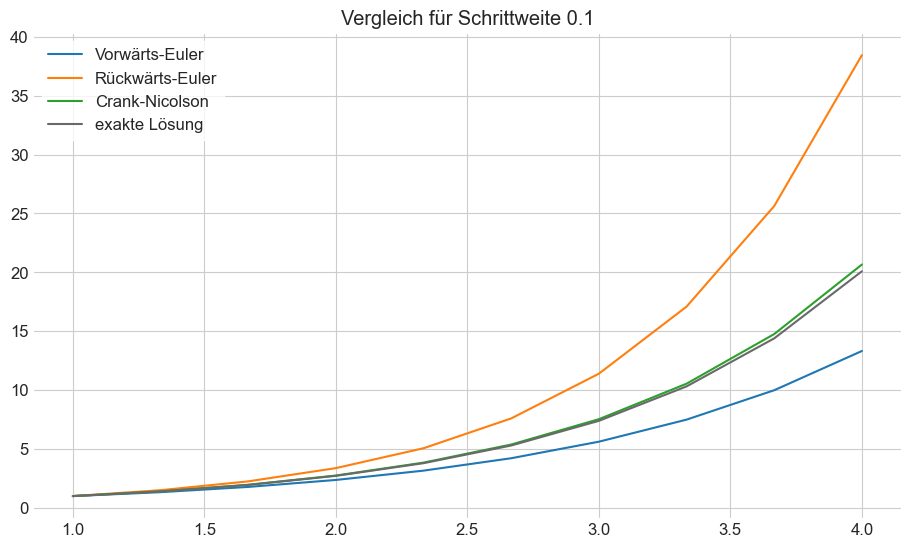

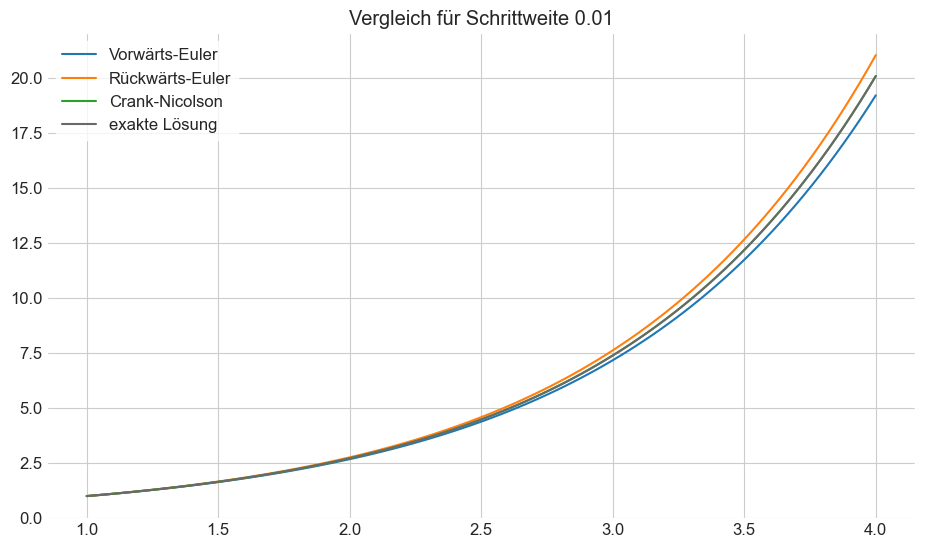

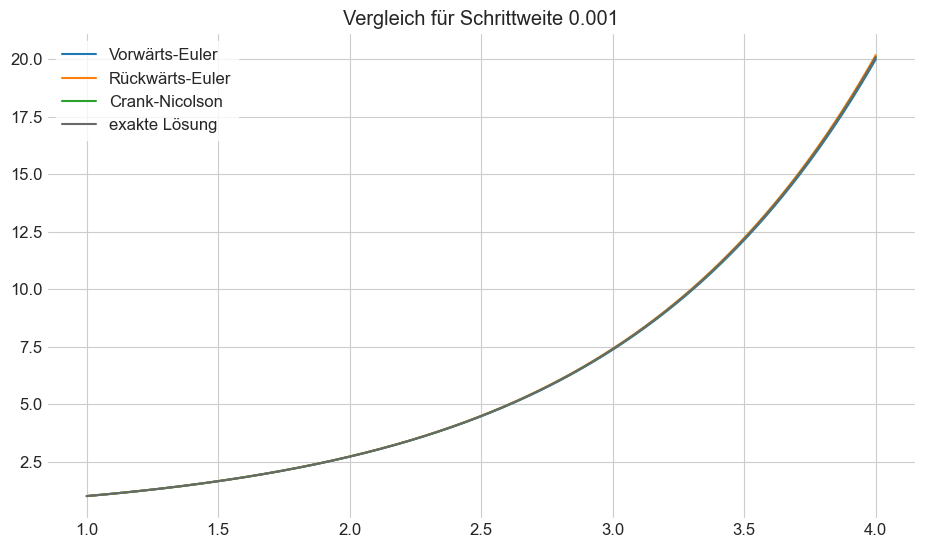

In [6]:
def f(t, y):
    return y

def exact(t):
    return np.exp(t-1)

def error(exact_vals, approx_vals):
    '''Maxmimum norm'''
    return max(np.abs(exact_vals - approx_vals).flatten())

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[0]) / np.log(steps[0] / steps[-1])

y0 = 1
steps = 10**np.arange(1, 4)

errors1 = errors2 = errors3 = ()

for k, N in enumerate(steps):
    t = np.linspace(1, 4, N)
        
    y1 = forwardEuler(f, y0, t)
    y2 = backwardEuler(f, y0, t)
    y3 = CrankNicolson(f, y0, t)
    
    errors1 += (error(exact(t), y1),)
    errors2 += (error(exact(t), y2),)
    errors3 += (error(exact(t), y3),)
    
    plt.plot(t, y1, label="Vorwärts-Euler")
    plt.plot(t, y2, label="Rückwärts-Euler")
    plt.plot(t, y3, label="Crank-Nicolson")
    
    plt.plot(t, exact(t), color="dimgray", label="exakte Lösung")
    plt.title(f"Vergleich für Schrittweite {1/N}")
    plt.legend()
    plt.show()

In [7]:
print("Verfahren:\t\t\t Vorwärts-Euler | Rückwärts-Euler | Crank-Nicolson")
for i, N in enumerate(steps):
    print(f"Fehler bei Schrittweite {1/N}:\t {errors1[i]:14.2E} | {errors2[i]:15.3E} | {errors3[i]:14.3E}")
print(f"Approximierte Konvergenzordnung: {order(errors1):14.2f} | {order(errors2):15.2f} | {order(errors3):14.2f}")

Verfahren:			 Vorwärts-Euler | Rückwärts-Euler | Crank-Nicolson
Fehler bei Schrittweite 0.1:	       6.77E+00 |       1.836E+01 |      5.753E-01
Fehler bei Schrittweite 0.01:	       8.75E-01 |       9.538E-01 |      4.406E-03
Fehler bei Schrittweite 0.001:	       9.01E-02 |       9.032E-02 |      9.036E-05
Approximierte Konvergenzordnung:           0.94 |            1.15 |           1.90


Man sieht, dass die ermittelten Konvergenzraten mit den analytischen zusammenpassen und das Crank-Nicolson schon für eine große Schrittweite sehr gut mit der exakten Lösung übereinstimmt.

#### Qualitativer Test
Nun folgt die qualitative Probe der beiden Verfahren anhand von einem Lotka-Volterra-System

\begin{cases}
    y_1'(t) = -(\alpha-\beta\ y_2(t))\ y1(t) \\
    y_2'(t) = (\gamma - \delta\ y_1(t))\ y_2(t) \\
    y_1(0) = 3,\ y_2(0) = 5
\end{cases}

für $\alpha = 1, \beta = 0.1, \gamma = 4$ und $\delta = 1,$ wobei $y_1$ die Zahl der Räuber und $y_2$ die Zahl der Beutetiere zur Zeit $t$ beschreibt.

Anstatt mit der exakten Lösung zu vergleichen, untersuchen wir, ob die beiden Verfahren für die Schrittweite $0.001$ die charakteristische Dynamik von dem Lotka-Volterra-System abbilden können. Zur Orientierung plotten wir zusätzlich das Vorwärts-Euler-Verfahren.

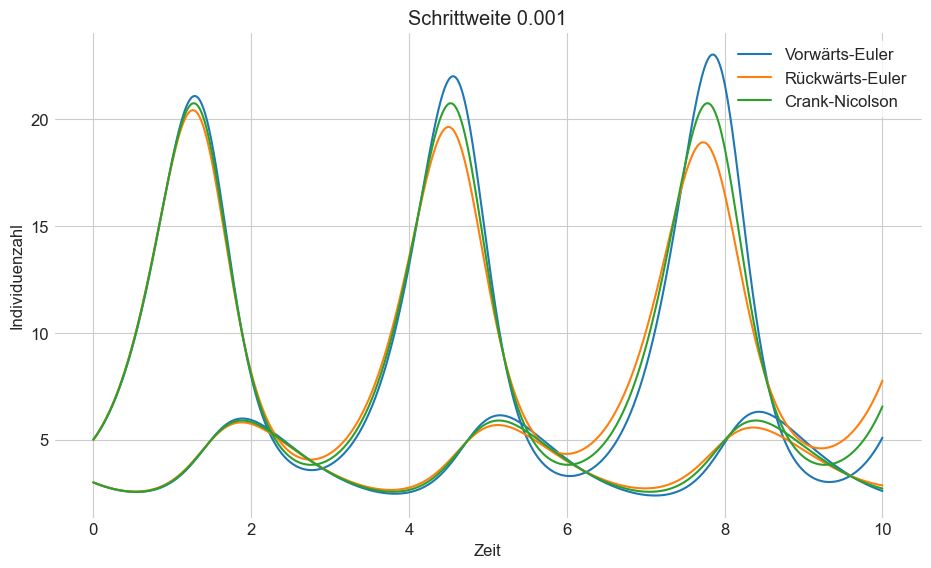

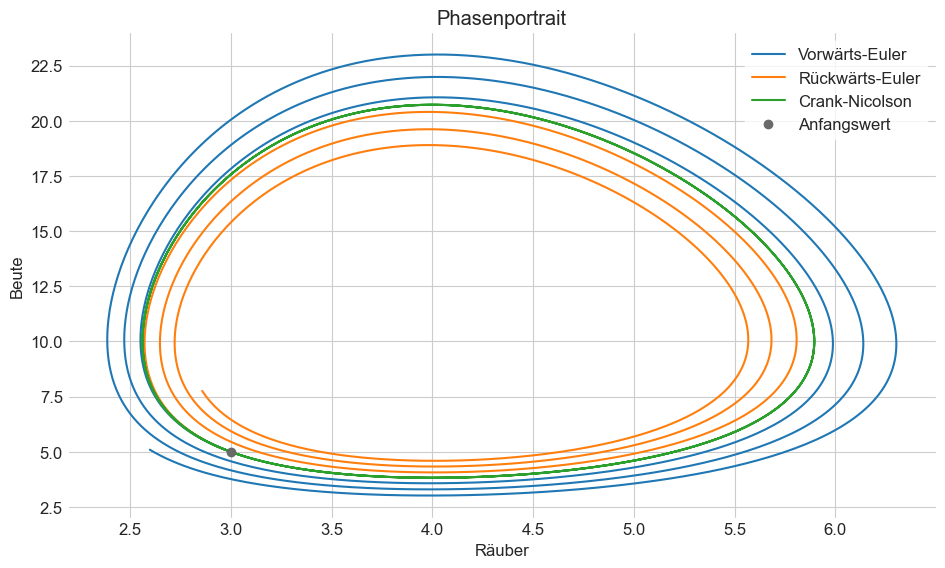

In [8]:
def f(t, y):
    y1, y2 = y
    return np.array([-(1 - 0.1 * y2) * y1, (4 - 1 * y1) * y2])

y0 = (3, 5)

t = np.linspace(0, 10, 1000)
y1 = forwardEuler(f, y0, t)
y2 = backwardEuler(f, y0, t)
y3 = CrankNicolson(f, y0, t)


plt.plot(t, y1[:, 0], color="C0", label="Vorwärts-Euler")
plt.plot(t, y1[:, 1], color="C0")
plt.plot(t, y2[:, 0], color="C1", label="Rückwärts-Euler")
plt.plot(t, y2[:, 1], color="C1")
plt.plot(t, y3[:, 0], color="C2", label="Crank-Nicolson")
plt.plot(t, y3[:, 1], color="C2")
plt.xlabel("Zeit")
plt.ylabel("Individuenzahl")
plt.title("Schrittweite 0.001")
plt.legend()
plt.show()

plt.plot(y1[:, 0], y1[:, 1], label="Vorwärts-Euler")
plt.plot(y2[:, 0], y2[:, 1], label="Rückwärts-Euler")
plt.plot(y3[:, 0], y3[:, 1], label="Crank-Nicolson")
plt.plot(*y0, "o", color="dimgray", label="Anfangswert")
plt.title("Phasenportrait")
plt.xlabel("Räuber")
plt.ylabel("Beute")
plt.legend()
plt.show()

Die Euler-Verfahren schaffen es nicht die Periode zu halten, sondern bewegen sich spiralförmig nach innen bzw. nach außen. Das Crank-Nicolson-Verfahren zeigt hingegen eine geschlossene Kurve im Phasenportrait und ist somit besser geeignet um komplexere Systeme zu lösen.